درخت تصمیم:

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()

In [3]:
x = iris.data[: , 2:]
y = iris.target

In [4]:
tree = DecisionTreeClassifier(max_depth= 2, random_state= 42)
tree.fit(x, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

ترسیم درخت:

In [5]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

[Text(0.4, 0.8333333333333334, 'sepal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = 0'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = 0'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'sepal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = 1'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = 1'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = 2')]

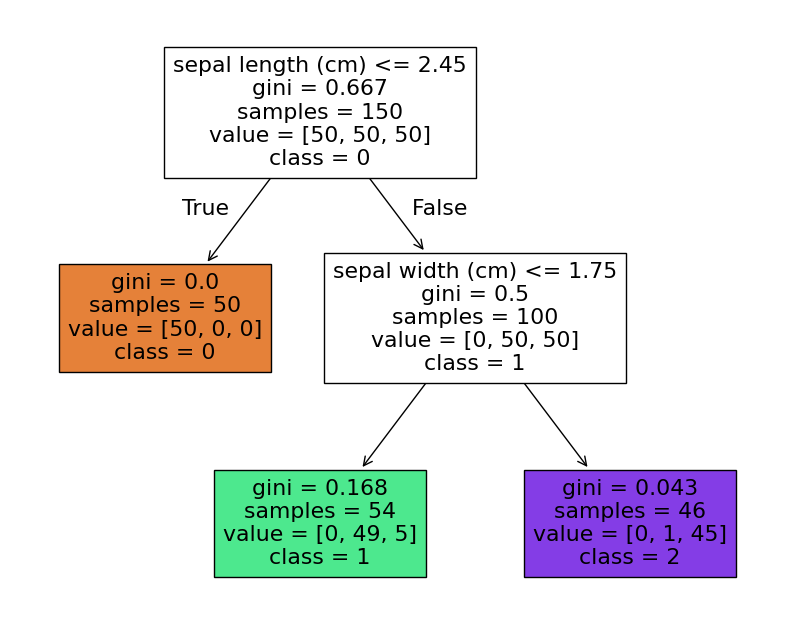

In [6]:
from sklearn.tree import plot_tree
plt.figure(figsize= (10, 8))
plot_tree(tree, feature_names= iris.feature_names, class_names= ['0', '1', '2'], filled= True)

In [7]:
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor(max_depth= 2, random_state= 42)
tree_reg.fit(x,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

[Text(0.4, 0.8333333333333334, 'sepal length (cm) <= 2.45\nsquared_error = 0.667\nsamples = 150\nvalue = 1.0'),
 Text(0.2, 0.5, 'squared_error = 0.0\nsamples = 50\nvalue = 0.0'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'sepal width (cm) <= 1.75\nsquared_error = 0.25\nsamples = 100\nvalue = 1.5'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.084\nsamples = 54\nvalue = 1.093'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.021\nsamples = 46\nvalue = 1.978')]

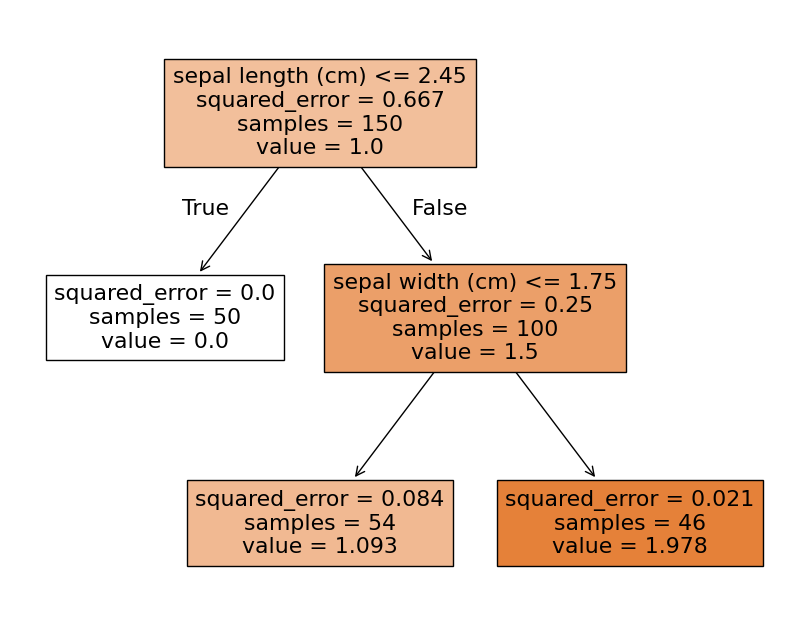

In [8]:
plt.figure(figsize= (10, 8))
plot_tree(tree_reg, feature_names= iris.feature_names, class_names= ['0', '1', '2'], filled= True)

---------------------------------------------------------------------------------------

svm:

In [9]:
from sklearn import datasets
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC

In [10]:
iris = datasets.load_iris()

In [11]:
x = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.float64)

In [12]:
svm_clf = Pipeline([("scaler", StandardScaler()), ("linear_svc", LinearSVC(C= 1, loss= 'hinge', random_state= 8)),  ])

In [13]:
svm_clf.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=8))])

In [14]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

دسته بندی با ماشین بردار پشتیبان غیرخطی:

In [15]:
from sklearn.datasets import make_moons

In [16]:
x, y = make_moons(n_samples= 100, noise= 0.15, random_state= 42)

In [17]:
def plot_dataset(x, y, axes):
    plt.plot(x[:, 0] [y == 0], x[:, 1] [y == 0], "bs")
    plt.plot(x[:, 0] [y == 1], x[:, 1] [y == 1], "g^")
    plt.axis(axes)
    plt.grid(True, which= 'both')
    plt.xlabel(r"$x_1$", fontsize= 20)
    plt.ylabel(r"$x_2$", fontsize= 20, rotation= 0)
    plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
    plt.show()


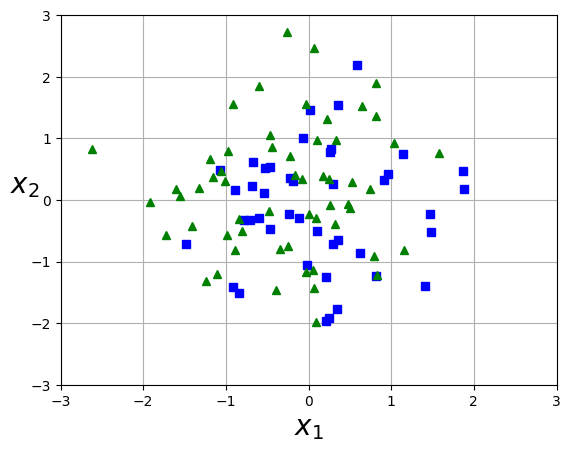

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def plot_dataset(x, y, axes):
    plt.plot(x[:, 0][y == 0], x[:, 1][y == 0], "bs")  
    plt.plot(x[:, 0][y == 1], x[:, 1][y == 1], "g^")  
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    plt.show()

# Example usage
np.random.seed(42)
x = np.random.randn(100, 2)  
y = np.random.randint(0, 2, size=100)  

plot_dataset(x, y, [-3, 3, -3, 3])  


In [19]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import PolynomialFeatures 


In [20]:
polynomial_svm_clf = Pipeline([("poly_features", PolynomialFeatures(degree= 3)), 
                               ("scaler", StandardScaler()), 
                               ("svm_clf", LinearSVC(C= 10, loss='hinge', random_state= 42))])

In [21]:
polynomial_svm_clf.fit(x, y)

c:\Users\kimia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

In [22]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    x = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(x).reshape(x0.shape)
    y_decision = lf.decision_function(x).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap= plt.cm.brg, alpha= 0.2)
    plt.contourf(x0, x1, y_decision, cmap= plt.cm.brg, alpha= 0.1)
    plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
    plt.show()

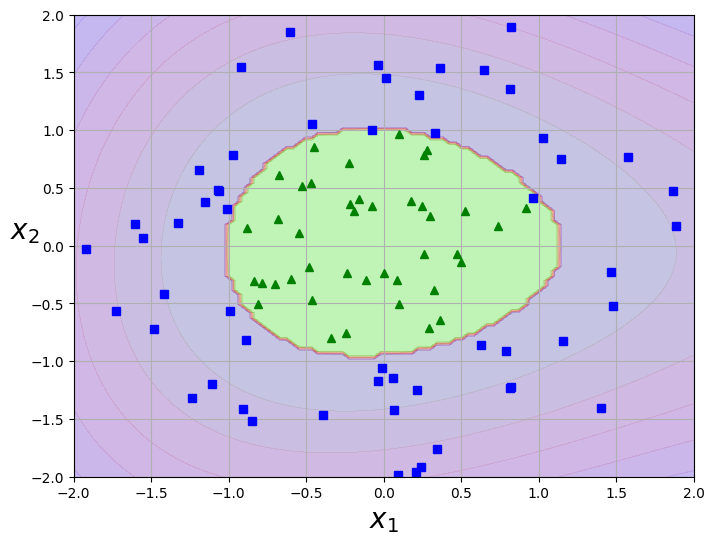

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    x = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(x).reshape(x0.shape)
    
    
    try:
        y_decision = clf.decision_function(x).reshape(x0.shape)
        plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    except AttributeError:
        pass

    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

def plot_dataset(x, y, axes):
    plt.plot(x[:, 0][y == 0], x[:, 1][y == 0], "bs")  
    plt.plot(x[:, 0][y == 1], x[:, 1][y == 1], "g^")  
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)


np.random.seed(42)
x = np.random.randn(100, 2)  
y = (x[:, 0] ** 2 + x[:, 1] ** 2 < 1).astype(int)  


polynomial_svm_clf = SVC(kernel="poly", degree=3, coef0=1, C=5)
polynomial_svm_clf.fit(x, y)


plt.figure(figsize=(8, 6))
plot_predictions(polynomial_svm_clf, [-2, 2, -2, 2])
plot_dataset(x, y, [-2, 2, -2, 2])
plt.show()


هسته ی چند جمله ای :

In [24]:
from sklearn.svm import SVC

In [25]:
poly_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),
                                ("svm_clf", SVC(kernel= "poly", degree= 3, coef0= 1, C= 5))])


poly_kernel_svm_clf.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [26]:
poly100_kernel_svm_clf = Pipeline([("scaler", StandardScaler()), 
                                    ("svm_clf", SVC(kernel= "poly", degree= 10, coef0= 100, C= 5))])


poly100_kernel_svm_clf.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

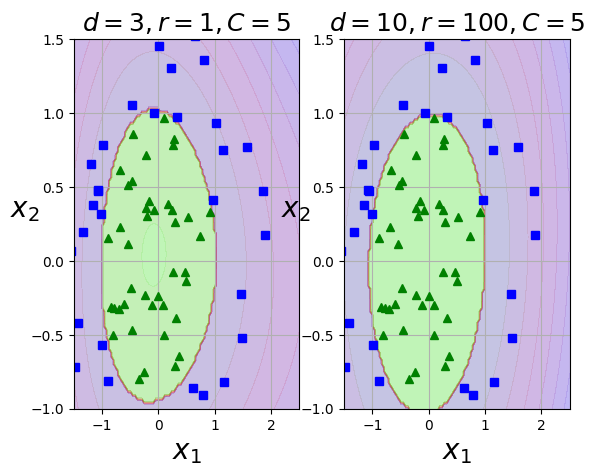

In [27]:
plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d= 3, r= 1, C=5$", fontsize= 18)
plt.subplot(122)

plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d= 10, r= 100, C=5$", fontsize= 18)
plt.show()

------------------------------------------------------------------------------------------------------------

دسته بندی در پایتون:

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets 


In [29]:
iris = datasets.load_iris()

In [30]:
x = pd.DataFrame(iris.data, columns= iris.feature_names)
y = pd.DataFrame(iris.target)

In [31]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
y.value_counts()

0
0    50
1    50
2    50
Name: count, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 2)

دسته بندی با استفاده از درخت تصمیم:

In [36]:
from sklearn.tree import DecisionTreeClassifier


In [37]:
tree =  DecisionTreeClassifier(random_state= 2, criterion= 'entropy', max_depth= 5, 
                               min_samples_split= 4, min_samples_leaf= 3)

In [38]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=4, random_state=2)

In [39]:
tree_pred = tree.predict(x_test)

In [40]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [41]:
from sklearn.metrics import accuracy_score


In [42]:
print("Accuracy Score:" ,accuracy_score(y_test, tree_pred))

Accuracy Score: 0.9736842105263158


In [43]:
cm = confusion_matrix(y_test, tree_pred)
print("confusion matrix:  \n", cm)

confusion matrix:  
 [[16  0  0]
 [ 0 10  1]
 [ 0  0 11]]


In [44]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [45]:
from sklearn.metrics import confusion_matrix

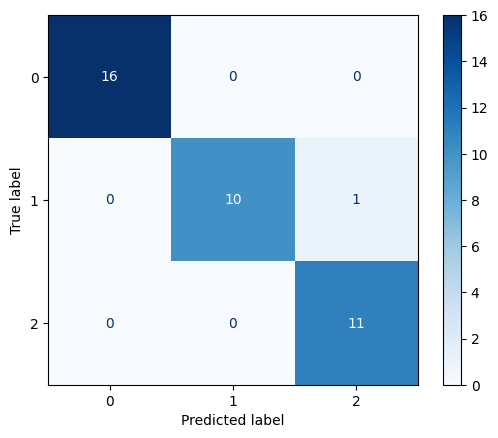

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues)
plt.show()


[Text(0.375, 0.875, 'petal width (cm) <= 0.8\nentropy = 1.582\nsamples = 112\nvalue = [34, 39, 39]\nclass = 1'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = 0'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'petal width (cm) <= 1.65\nentropy = 1.0\nsamples = 78\nvalue = [0, 39, 39]\nclass = 1'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'petal length (cm) <= 4.95\nentropy = 0.378\nsamples = 41\nvalue = [0, 38, 3]\nclass = 1'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = 1'),
 Text(0.375, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]\nclass = 2'),
 Text(0.75, 0.375, 'petal length (cm) <= 4.85\nentropy = 0.179\nsamples = 37\nvalue = [0, 1, 36]\nclass = 2'),
 Text(0.625, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]\nclass = 2'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 34\nvalue = [0, 0, 34]\nclass = 2')]

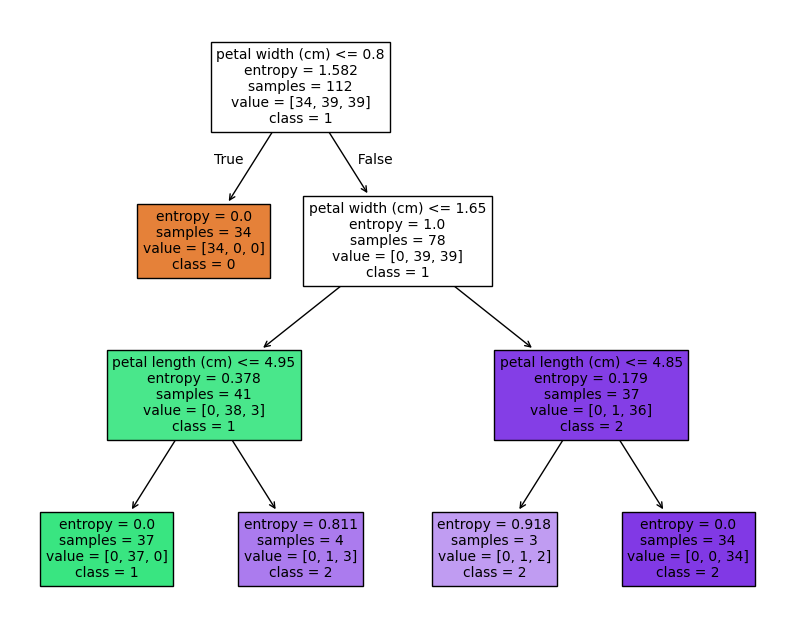

In [47]:
from sklearn.tree import plot_tree
plt.figure(figsize= (10 ,8))
plot_tree(tree, feature_names= iris.feature_names, class_names= ['0', '1', '2'], filled= True)

:دسته بندی با استفاده از 
GaussianNB

In [48]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)

c:\Users\kimia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
print("Accuracy Score:" , accuracy_score(y_test, gnb_pred))

Accuracy Score: 0.9736842105263158


In [50]:
cm = confusion_matrix(y_test, gnb_pred)
print("confusion matrix:  \n", cm)
print(classification_report(y_test, gnb_pred))

confusion matrix:  
 [[16  0  0]
 [ 0 10  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



دسته بندی با استفاده از K-NN :

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

c:\Users\kimia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [53]:
print("Accuracy Score:", accuracy_score(y_test, knn_pred))

Accuracy Score: 1.0


In [54]:
cm = confusion_matrix(y_test, knn_pred)
print("confusion matrix:  \n", cm)
print(classification_report(y_test, knn_pred))

confusion matrix:  
 [[16  0  0]
 [ 0 11  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



دسته بندی با استفاده از رگرسیون:

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, lr_pred))

Accuracy Score: 0.9736842105263158


c:\Users\kimia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
cm = confusion_matrix(y_test, lr_pred)
print("confusion matrix:  \n", cm)
print(classification_report(y_test, lr_pred))

confusion matrix:  
 [[16  0  0]
 [ 0 10  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



دسته بندی با استفاده از شبکه عصبی:

In [58]:
from sklearn.neural_network import MLPClassifier

In [59]:
nn = MLPClassifier(random_state= 1, learning_rate_init= 0.01,
                   learning_rate= 'invscaling', max_iter= 300)

In [60]:
nn.fit(x_train, y_train)
nn_pred = nn.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, nn_pred))

c:\Users\kimia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score: 1.0


In [61]:
cm = confusion_matrix(y_test, nn_pred)
print("confusion matrix:  \n", cm)
print(classification_report(y_test, nn_pred))

confusion matrix:  
 [[16  0  0]
 [ 0 11  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



دسته بندی با استفاده از ماشین بردار پشتیبان:

In [62]:
from sklearn.svm import SVC

In [63]:
svc = SVC(kernel= 'poly', degree= 4)
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)

c:\Users\kimia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
print("Accuracy Score:", accuracy_score(y_test, svc_pred))

Accuracy Score: 1.0


In [65]:
cm = confusion_matrix(y_test, svc_pred)
print("confusion matrix:  \n", cm)
print(classification_report(y_test, svc_pred))

confusion matrix:  
 [[16  0  0]
 [ 0 11  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



---------------------------------------------------------------------------------------------------------

پیش بینی در پایتون:

In [66]:
import pandas as pd
import numpy as np

In [67]:
dataset = pd.read_csv('petrol_consumption.csv')

In [68]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [69]:
x = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [72]:
from sklearn.preprocessing import StandardScaler 

In [73]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

پیش بینی با استفاده از درخت تصمیم:

In [74]:
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

In [75]:
tree = DecisionTreeRegressor(random_state= 0, criterion= 'squared_error',
                             max_depth= 3, min_samples_split= 3)



In [76]:
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

In [77]:
print('MAS: ', metrics.mean_absolute_error(y_test, y_pred))

MAS:  56.86819444444444


In [78]:
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

MSE:  4890.384031828704


In [79]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE:  69.93128078212713


پیش بینی با استفاده از K-NN:

In [80]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors= 5, weights= 'uniform')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [81]:
print('MAS: ', metrics.mean_absolute_error(y_test, y_pred))

MAS:  64.12000000000002


In [82]:
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

MSE:  5069.816000000002


In [83]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE:  71.20264040047954


پیش بینی با استفاده از شبکه ی عصبی:

In [84]:
from sklearn.neural_network import MLPRegressor

In [85]:
mlp = MLPRegressor(random_state= 5, hidden_layer_sizes= (20),
                   max_iter= 150, learning_rate_init= 0.01,
                   activation= 'relu', learning_rate= 'invscaling',
                   momentum= 0.4)

In [86]:
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

c:\Users\kimia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


In [87]:
print('MAS: ', metrics.mean_absolute_error(y_test, y_pred))

MAS:  438.2922937882228


In [88]:
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

MSE:  196856.75787258116


In [89]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE:  443.68542670746035


پیش بینی با استفاده از رگرسیون:

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [92]:
print('MAS: ', metrics.mean_absolute_error(y_test, y_pred))

MAS:  56.822247478964734


In [93]:
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

MSE:  4666.34478758837


In [94]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE:  68.31064915215175


پیش بینی با استفاده از ماشین بردار پشتیبان:

In [95]:
from sklearn.svm import SVR

In [96]:
svr = SVR(kernel= 'rbf', degree= 3, C= 0.9)
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)

In [97]:
print('MAS: ', metrics.mean_absolute_error(y_test, y_pred))

MAS:  55.072436818828656


In [98]:
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

MSE:  5850.014047574007


In [99]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE:  76.48538453570072


-----------------------------------------------------------------------------------------------------------

قوانین انجمنی
| Association rules

In [101]:
! pip install mlxtend


Defaulting to user installation because normal site-packages is not writeable
  Using cached mlxtend-0.23.3-py3-none-any.whl.metadata (7.3 kB)
Using cached mlxtend-0.23.3-py3-none-any.whl (1.4 MB)


In [124]:
! pip install --upgrade mlxtend


Defaulting to user installation because normal site-packages is not writeable


In [125]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori


In [126]:
dataset = [['milk', 'onion', 'nutmeg', 'kidney beans', 'eggs', 'yogurt'],
           ['dill', 'onion', 'nutmeg', 'kidney beans', 'eggs', 'yogurt'],
           ['milk', 'apple', 'kidney beans', 'eggs'],
           ['milk', 'unicorn', 'corn', 'kidney beans', 'yogurt'],
           ['corn', 'onion', 'onion', 'kidney beans', 'ice cream', 'eggs']]

In [127]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns= te.columns_)
frequent_itemsets = apriori(df, min_support=0.6, use_colnames= True)
frequent_itemsets

,support,itemsets
0,0.8,(eggs)
1,1.0,(kidney beans)
2,0.6,(milk)
3,0.6,(onion)
4,0.6,(yogurt)
5,0.8,"(eggs, kidney beans)"
6,0.6,"(onion, eggs)"
7,0.6,"(kidney beans, milk)"
8,0.6,"(onion, kidney beans)"
9,0.6,"(kidney beans, yogurt)"


In [128]:
from mlxtend.frequent_patterns import association_rules

In [138]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

num_itemsets = frequent_itemsets['itemsets'].apply(len)


rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7, num_itemsets=num_itemsets)
rules

C:\Users\kimia\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(eggs),(kidney beans),0.8,1.0,0.8,1.00,1.00,1.0,0.00,inf,0.0,0.80,0.000,0.900
1,(kidney beans),(eggs),1.0,0.8,0.8,0.80,1.00,1.0,0.00,1.0,0.0,0.80,0.000,0.900
2,(onion),(eggs),0.6,0.8,0.6,1.00,1.25,1.0,0.12,inf,0.5,0.75,1.000,0.875
3,(eggs),(onion),0.8,0.6,0.6,0.75,1.25,1.0,0.12,1.6,1.0,0.75,0.375,0.875
4,(milk),(kidney beans),0.6,1.0,0.6,1.00,1.00,1.0,0.00,inf,0.0,0.60,0.000,0.800
5,(onion),(kidney beans),0.6,1.0,0.6,1.00,1.00,1.0,0.00,inf,0.0,0.60,0.000,0.800
6,(yogurt),(kidney beans),0.6,1.0,0.6,1.00,1.00,1.0,0.00,inf,0.0,0.60,0.000,0.800
7,"(onion, kidney beans)",(eggs),0.6,0.8,0.6,1.00,1.25,1.0,0.12,inf,0.5,0.75,1.000,0.875
8,"(onion, eggs)",(kidney beans),0.6,1.0,0.6,1.00,1.00,1.0,0.00,inf,0.0,0.60,0.000,0.800
9,"(eggs, kidney beans)",(onion),0.8,0.6,0.6,0.75,1.25,1.0,0.12,1.6,1.0,0.75,0.375,0.875


In [139]:
dataset = [['milk', 'onion', 'nutmeg', 'kidney beans', 'eggs', 'yogurt'],
           ['dill', 'onion', 'nutmeg', 'kidney beans', 'eggs', 'yogurt'],
           ['milk', 'apple', 'kidney beans', 'eggs'],
           ['milk', 'unicorn', 'corn', 'kidney beans', 'yogurt'],
           ['corn', 'onion', 'onion', 'kidney beans', 'ice cream', 'eggs']]



import pandas as pd 
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns= te.columns_)
df


,apple,corn,dill,eggs,ice cream,kidney beans,milk,nutmeg,onion,unicorn,yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [141]:
from mlxtend.frequent_patterns import fpgrowth

In [142]:
fpgrowth(df, min_support= 0.6)

,support,itemsets
0,1.0,(5)
1,0.8,(3)
2,0.6,(10)
3,0.6,(6)
4,0.6,(8)
5,0.8,"(3, 5)"
6,0.6,"(10, 5)"
7,0.6,"(5, 6)"
8,0.6,"(8, 3)"
9,0.6,"(8, 5)"


In [143]:
fpgrowth(df, min_support= 0.6, use_colnames= True)

,support,itemsets
0,1.0,(kidney beans)
1,0.8,(eggs)
2,0.6,(yogurt)
3,0.6,(milk)
4,0.6,(onion)
5,0.8,"(eggs, kidney beans)"
6,0.6,"(kidney beans, yogurt)"
7,0.6,"(kidney beans, milk)"
8,0.6,"(onion, eggs)"
9,0.6,"(onion, kidney beans)"
